In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
path = '../data/raw/ml-latest-small/' # 경로 설정

ratings = pd.read_csv(f'{path}ratings.csv')
movies = pd.read_csv(f'{path}movies.csv')

# 데이터 형태 확인
print(f"Total Ratings: {len(ratings)}")
print(f"Unique Users: {ratings['userId'].nunique()}")
print(f"Unique movies: {movies['movieId'].nunique()}")

display(ratings.head())
# display(movies.head())

Total Ratings: 100836
Unique Users: 610
Unique movies: 9742


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# User-Item Matrix 크기 계산
n_users = ratings['userId'].nunique()
n_movies = movies['movieId'].nunique()
total_elements = n_users * n_movies
print(f"total elements: {total_elements}")

# 실제 평가된 항목 수
n_ratings = len(ratings)
print(f"number of ratings: {n_ratings}")

# Sparsity(희소성) 계산
# 왜? Matrix Factorization이 필요한가?
sparsity = (1 - (n_ratings / total_elements)) * 100
print(f"Matrix Sparsity: {sparsity:.2f}%")

total elements: 5942620
number of ratings: 100836
Matrix Sparsity: 98.30%


movieId
356     329
318     317
296     307
593     279
2571    278
Name: rating, dtype: int64


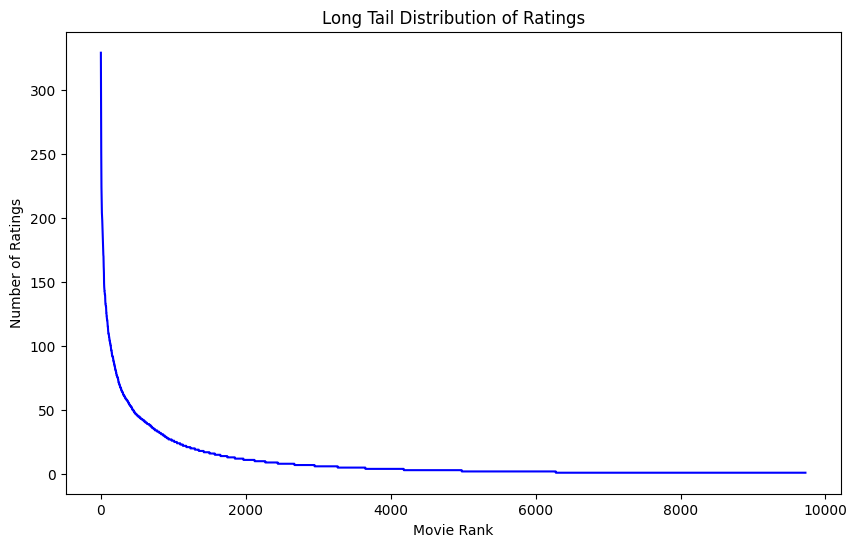

In [ ]:
# 영화별로 실제 유저가 평가한 수를 카운트
movie_counts = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False) 
print(movie_counts.head())

# 시각화
# 유명한 영화에 사람들이 평가한게 몰려있다는걸 알 수 있음 (Long Tail Distribution)
# 그래서 개인화된 추천이 필요하다
plt.figure(figsize=(10, 6))
plt.plot(movie_counts.values, color='blue')
plt.title('Long Tail Distribution of Ratings')
plt.xlabel('Movie Rank')
plt.ylabel('Number of Ratings')
plt.show()
